In [ ]:
!pip install geopandas fiona pyproj rtree
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 11.2 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipafont-mincho.
Preparing to unpack .../fonts-ipafont-mincho_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-mincho (00303-21ubuntu1) ...
Setting up fonts-ipafont-mincho (00303-21ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-mincho/

In [ ]:
from google.colab import drive
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import folium

以下は自分の環境に合わせてMAPしてください。

In [27]:
drive.mount('/content/drive')
#自分の環境に合わせて設定
shp_path1 = '/content/drive/My Drive/HYOGO/B002005212020DDSWC28442/r2kb28442.shp'
shp_path2 = '/content/drive/My Drive/HYOGO/B002005212020DDSWC28443/r2kb28443.shp'
shp_path3 = '/content/drive/My Drive/HYOGO/B002005212020DDSWC28446/r2kb28446.shp'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 読み込み
gdf1 = gpd.read_file(shp_path1)
gdf2 = gpd.read_file(shp_path2)
gdf3 = gpd.read_file(shp_path3)
# 各ファイルのCRSを確認
print("gdf1 CRS:", gdf1.crs)
print("gdf2 CRS:", gdf2.crs)
print("gdf3 CRS:", gdf3.crs)
# WGS84(経緯度)に変換（EPSG:4326）
gdf1 = gdf1.to_crs(epsg=4326)
gdf2 = gdf2.to_crs(epsg=4326)
gdf3 = gdf3.to_crs(epsg=4326)
# 確認
print("変換後 gdf1 CRS:", gdf1.crs)
print("変換後 gdf2 CRS:", gdf2.crs)
print("変換後 gdf3 CRS:", gdf3.crs)

gdf1 CRS: EPSG:4612
gdf2 CRS: EPSG:4612
gdf3 CRS: EPSG:4612
変換後 gdf1 CRS: EPSG:4326
変換後 gdf2 CRS: EPSG:4326
変換後 gdf3 CRS: EPSG:4326


In [ ]:
# 属性＋ジオメトリを結合
gdf = pd.concat([gdf1, gdf2, gdf3], ignore_index=True)
print(f"結合後の行数: {len(gdf)}")  # → 合計行数
gdf.head()

結合後の行数: 565


,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,284420001101,28,442,001000010,0001101,兵庫県,市川町,西川辺,None,8101,...,4420001-1-01,60,27,28,442,134.764842,34.993701,0010-00010,1-1- 1,"POLYGON ((134.76812 34.9989, 134.76812 34.9987..."
1,284420001102,28,442,001000020,0001102,兵庫県,市川町,西川辺,None,8101,...,4420001-1-02,38,14,28,442,134.768406,34.994959,0010-00020,1-1- 2,"POLYGON ((134.77245 34.99712, 134.77237 34.997..."
2,284420002101,28,442,004000010,0002101,兵庫県,市川町,東川辺,None,8101,...,4420002-1-01,163,49,28,442,134.770989,34.991993,0040-00010,2-1- 1,"POLYGON ((134.77302 34.98886, 134.7729 34.9887..."
3,284420002102,28,442,004000020,0002102,兵庫県,市川町,東川辺,None,8101,...,4420002-1-02,69,28,28,442,134.774032,34.992985,0040-00020,2-1- 2,"POLYGON ((134.77684 34.99275, 134.77672 34.992..."
4,284420003101,28,442,004000040,0003101,兵庫県,市川町,東川辺,None,8101,...,4420003-1-01,58,21,28,442,134.777046,34.994979,0040-00040,3-1- 1,"POLYGON ((134.78086 34.99714, 134.7807 34.9968..."


In [ ]:
# KEY_CODE カラムをツールチップで表示
m = gdf.explore(
    tooltip=["CITY_NAME", "S_NAME"],   # リストで複数指定
    popup=["CITY_NAME", "S_NAME"],     # クリック時のポップアップも同様に
    tiles="CartoDB positron",
    zoom_start=10
)
# Jupyter/Colab 上で地図を表示
m

Output hidden; open in https://colab.research.google.com to view.

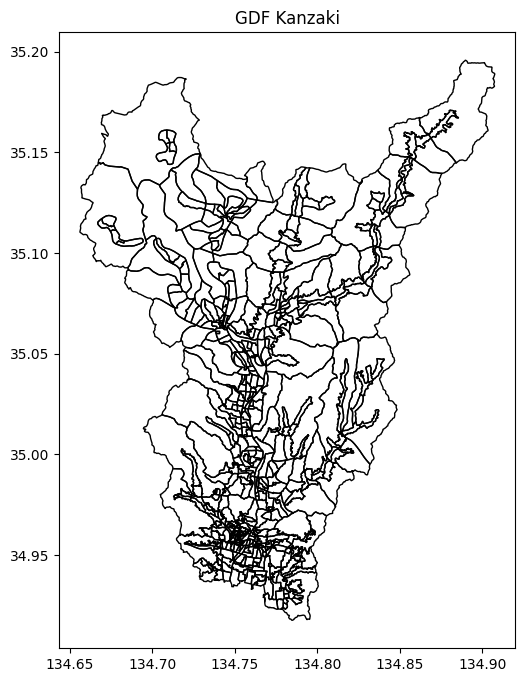

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, edgecolor='black', facecolor='none')
ax.set_title('GDF Kanzaki')
plt.show()

In [ ]:
# Base map
m = folium.Map(location=[34.8, 134.7], zoom_start=12, control_scale=True)
for _, row in gdf.iterrows():
    # Polygons
    folium.GeoJson(
        row.geometry.__geo_interface__,
        style_function=lambda feat: {
            'fillColor': 'lightgray',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5
        }
    ).add_to(m)
    # Labels
    centroid = row.geometry.centroid
    folium.map.Marker(
        [centroid.y, centroid.x],
        icon=folium.DivIcon(html=f"""<div style="font-size:10px; font-weight:bold">{row['S_NAME']}</div>""")
    ).add_to(m)

m



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ① CSV に出力（ヘッダー付き、行番号は不要）
gdf.to_csv('kanzaki.csv', index=False, encoding='utf-8-sig')
# ② Colab 上なら、これでダウンロードダイアログが出ます
from google.colab import files
files.download('kanzaki.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ② geometry 列は WKT（文字列）に変換するか、あるいはエクセルに不要なら drop
df = gdf.copy()
df['geometry'] = df['geometry'].apply(lambda geom: geom.wkt)
# ③ Excel に書き出し（UTF-8 対応の engine=openpyxl）
excel_path = 'kanzaki.xlsx'
df.to_excel(excel_path, index=False, engine='openpyxl')
# ④ Colab からダウンロード
files.download(excel_path)

/tmp/ipython-input-611173963.py:3: UserWarning: Geometry column does not contain geometry.
  df['geometry'] = df['geometry'].apply(lambda geom: geom.wkt)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>